# Setup workspace, load data, and calculate needed variables

### Import packages and setup options/directories

In [1]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import datetime
import geopandas as gpd
from glob import glob
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import regionmask
#from reverse_colormap import reverse_colormap # in python dir
import scipy.stats as stats
from scipy import interpolate as spinterpolate
from shapely.geometry import Polygon
import warnings
import xarray as xr

In [2]:
%matplotlib inline

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# - See what dir we're in
os.getcwd()

'/opt/skipjack-bigeye-separation/python/bet_skj_separation_paper_v3'

In [5]:
# - Choose set types you want to analyze
# ...settypes options are: afaddfad, afaddfadlog, allsets,
# unassociated, unassociatedother
# ...catchorcpue options are: catch, CPUE 
settypes = 'afaddfadlog'
catchorcpue = 'CPUE'

In [6]:
# - Set data path
dpath = '/opt/skipjack-bigeye-separation/data/'

In [7]:
# - Set saved out figure path
figpath = '/opt/skipjack-bigeye-separation/python/bet_skj_separation_paper_v3/figures_' + settypes + catchorcpue + '/'

### Set up custom colormaps

In [8]:
blue = colors.to_rgba('tab:blue')
red = colors.to_rgba('tab:red')
green = colors.to_rgba('tab:green')
yellow = colors.to_rgba('tab:olive')
orange = colors.to_rgba('tab:orange')
bs5cmp_nonone = ListedColormap(
    np.vstack((blue,red,green,yellow,orange)))

### Define fxns

In [9]:
%run helper_notebooks/bet_skj_sep_fxns.ipynb

### Load WCPFC and ENSO time series data

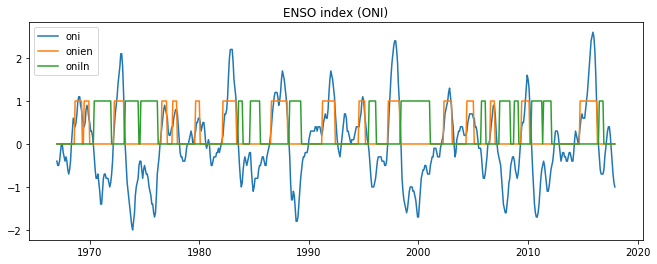

In [10]:
%run helper_notebooks/wcpfc_enso_load_and_calc.ipynb

### Compute temporal correlations btwn BET and BET:SKJ vs. SKJ CPUE

In [11]:
%run helper_notebooks/compute_bet_b2s_vs_skj.ipynb

### Create EEZ map mask

In [12]:
%run helper_notebooks/create_eez_mask_map.ipynb

### Load oceanographic data

In [13]:
%run helper_notebooks/env_vars_load_and_calc.ipynb

### Put all CPUE and env vars into one xr dataset and onto same grid for ease of use by following calculations

In [14]:
dsallvars = bettoskj_cp_tot.to_dataset(name='bettoskj_cp_tot')
dsallvars['skj_cp_tot'] = skj_cp_tot
dsallvars['bet_cp_tot'] = bet_cp_tot
dsallvars['sst'] = sst
dsallvars['temp100'] = temp100
dsallvars['tcd'] = tcd
dsallvars['sss'] = sss
dsallvars['o2100'] = o2100
dsallvars['po2100'] = po2100
dsallvars['thd'] = thd
dsallvars['logchl'] = logchl
dsallvars['mld'] = mld
dsallvars['ssha'] = ssha
dsallvars['oni'] = oni
dfallvars = dsallvars.to_dataframe()
dfallvars.drop(columns=['depth'], inplace=True)
dfallvars.reset_index(inplace=True)

### Compute quotient analyses for SKJ and BET CPUE vs. environmental conditions

In [15]:
#%%script false --no-raise-error
%run helper_notebooks/compute_qa_bet_skj_cpue.ipynb

### Compute temporal correlations btwn SKJ, BET, BET:SKJ CPUE vs. environmental conditions

In [16]:
%run helper_notebooks/compute_bet_skj_b2s_vs_env.ipynb

### Compute mean, ENSO, and seasonal summary maps

In [21]:
bettoskjr3 = np.linspace(bettoskj_cp_tot_mean.min(),bettoskj_cp_tot_mean.max(),4)
bettoskj_r3co1 = bettoskjr3[1]; bettoskj_r3co2 = bettoskjr3[2]

skjr4 = np.linspace(skj_cp_tot_mean.min(),skj_cp_tot_mean.max(),5)
skj_r4co1 = skjr4[1]; skj_r4co2 = skjr4[2]; skj_r4co3 = skjr4[3]
betr4 = np.linspace(bet_cp_tot_mean.min(),bet_cp_tot_mean.max(),5)

bet_r4co1 = betr4[1]; bet_r4co2 = betr4[2]; bet_r4co3 = betr4[3]
bettoskjr4 = np.linspace(bettoskj_cp_tot_mean.min(),bettoskj_cp_tot_mean.max(),5)
bettoskj_r4co1 = bettoskjr4[1]; bettoskj_r4co2 = bettoskjr4[2]; bettoskj_r4co3 = bettoskjr4[3]

In [22]:
fdmap7_8 = bettoskj_cp_tot_mean.copy()
fdmap7_8 = xr.where((skj_cp_tot_mean<=skj_r4co2)
                  & (bet_cp_tot_mean<=bet_r4co2)
                  & (bettoskj_cp_tot_mean>=bettoskj_r3co2)
                  , 0.5, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean<=skj_r4co2)
                  & (bet_cp_tot_mean<=bet_r4co2)
                  & (bettoskj_cp_tot_mean>bettoskj_r3co1)
                  & (bettoskj_cp_tot_mean<bettoskj_r3co2)
                  , 0.75, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean<=skj_r4co2)
                  & (bet_cp_tot_mean<=bet_r4co2)
                  & (bettoskj_cp_tot_mean<=bettoskj_r3co1)
                  , 1, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean<skj_r4co2)
                  & (bet_cp_tot_mean>bet_r4co2)
                  & (bettoskj_cp_tot_mean>=bettoskj_r3co2)
                  , 1.5, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean<skj_r4co2)
                  & (bet_cp_tot_mean>bet_r4co2)
                  & (bettoskj_cp_tot_mean>bettoskj_r3co1)
                  & (bettoskj_cp_tot_mean<bettoskj_r3co2)
                  , 1.75, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean<skj_r4co2)
                  & (bet_cp_tot_mean>bet_r4co2)
                  & (bettoskj_cp_tot_mean<=bettoskj_r3co1)
                  , 2, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean>skj_r4co2)
                  & (bet_cp_tot_mean<bet_r4co2)
                  & (bettoskj_cp_tot_mean>=bettoskj_r3co2)
                  , 2.5, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean>skj_r4co2)
                  & (bet_cp_tot_mean<bet_r4co2)
                  & (bettoskj_cp_tot_mean>bettoskj_r3co1)
                  & (bettoskj_cp_tot_mean<bettoskj_r3co2)
                  , 2.75, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean>skj_r4co2)
                  & (bet_cp_tot_mean<bet_r4co2)
                  & (bettoskj_cp_tot_mean<=bettoskj_r3co1)
                  , 3, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean>=skj_r4co2)
                  & (bet_cp_tot_mean>=bet_r4co2)
                  & (bettoskj_cp_tot_mean>=bettoskj_r3co2)
                  , 4.5, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean>=skj_r4co2)
                  & (bet_cp_tot_mean>=bet_r4co2)
                  & (bettoskj_cp_tot_mean>bettoskj_r3co1)
                  & (bettoskj_cp_tot_mean<bettoskj_r3co2)
                  , 4.75, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean>=skj_r4co2)
                  & (bet_cp_tot_mean>=bet_r4co2)
                  & (bettoskj_cp_tot_mean<=bettoskj_r3co1)
                  , 5, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean<skj_r4co3)
                  & (skj_cp_tot_mean>skj_r4co1)
                  & (bet_cp_tot_mean<bet_r4co3)
                  & (bet_cp_tot_mean>bet_r4co1)
                  & (bettoskj_cp_tot_mean>=bettoskj_r3co2)
                  , 3.5, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean<skj_r4co3)
                  & (skj_cp_tot_mean>skj_r4co1)
                  & (bet_cp_tot_mean<bet_r4co3)
                  & (bet_cp_tot_mean>bet_r4co1)
                  & (bettoskj_cp_tot_mean>bettoskj_r3co1)
                  & (bettoskj_cp_tot_mean<bettoskj_r3co2)
                  , 3.75, fdmap7_8)
fdmap7_8 = xr.where((skj_cp_tot_mean<skj_r4co3)
                  & (skj_cp_tot_mean>skj_r4co1)
                  & (bet_cp_tot_mean<bet_r4co3)
                  & (bet_cp_tot_mean>bet_r4co1)
                  & (bettoskj_cp_tot_mean<=bettoskj_r3co1)
                  , 4, fdmap7_8)
fdmap7_8 = xr.where(fdmap7_8<0.5,0,fdmap7_8)

In [23]:
fdmapen7_8 = bettoskj_cp_tot_en.copy()
fdmapen7_8 = xr.where((skj_cp_tot_en<=skj_r4co2)
                  & (bet_cp_tot_en<=bet_r4co2)
                  & (bettoskj_cp_tot_en>=bettoskj_r3co2)
                  , 0.5, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en<=skj_r4co2)
                  & (bet_cp_tot_en<=bet_r4co2)
                  & (bettoskj_cp_tot_en>bettoskj_r3co1)
                  & (bettoskj_cp_tot_en<bettoskj_r3co2)
                  , 0.75, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en<=skj_r4co2)
                  & (bet_cp_tot_en<=bet_r4co2)
                  & (bettoskj_cp_tot_en<=bettoskj_r3co1)
                  , 1, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en<skj_r4co2)
                  & (bet_cp_tot_en>bet_r4co2)
                  & (bettoskj_cp_tot_en>=bettoskj_r3co2)
                  , 1.5, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en<skj_r4co2)
                  & (bet_cp_tot_en>bet_r4co2)
                  & (bettoskj_cp_tot_en>bettoskj_r3co1)
                  & (bettoskj_cp_tot_en<bettoskj_r3co2)
                  , 1.75, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en<skj_r4co2)
                  & (bet_cp_tot_en>bet_r4co2)
                  & (bettoskj_cp_tot_en<=bettoskj_r3co1)
                  , 2, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en>skj_r4co2)
                  & (bet_cp_tot_en<bet_r4co2)
                  & (bettoskj_cp_tot_en>=bettoskj_r3co2)
                  , 2.5, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en>skj_r4co2)
                  & (bet_cp_tot_en<bet_r4co2)
                  & (bettoskj_cp_tot_en>bettoskj_r3co1)
                  & (bettoskj_cp_tot_en<bettoskj_r3co2)
                  , 2.75, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en>skj_r4co2)
                  & (bet_cp_tot_en<bet_r4co2)
                  & (bettoskj_cp_tot_en<=bettoskj_r3co1)
                  , 3, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en>=skj_r4co2)
                  & (bet_cp_tot_en>=bet_r4co2)
                  & (bettoskj_cp_tot_en>=bettoskj_r3co2)
                  , 4.5, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en>=skj_r4co2)
                  & (bet_cp_tot_en>=bet_r4co2)
                  & (bettoskj_cp_tot_en>bettoskj_r3co1)
                  & (bettoskj_cp_tot_en<bettoskj_r3co2)
                  , 4.75, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en>=skj_r4co2)
                  & (bet_cp_tot_en>=bet_r4co2)
                  & (bettoskj_cp_tot_en<=bettoskj_r3co1)
                  , 5, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en<skj_r4co3)
                  & (skj_cp_tot_en>skj_r4co1)
                  & (bet_cp_tot_en<bet_r4co3)
                  & (bet_cp_tot_en>bet_r4co1)
                  & (bettoskj_cp_tot_en>=bettoskj_r3co2)
                  , 3.5, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en<skj_r4co3)
                  & (skj_cp_tot_en>skj_r4co1)
                  & (bet_cp_tot_en<bet_r4co3)
                  & (bet_cp_tot_en>bet_r4co1)
                  & (bettoskj_cp_tot_en>bettoskj_r3co1)
                  & (bettoskj_cp_tot_en<bettoskj_r3co2)
                  , 3.75, fdmapen7_8)
fdmapen7_8 = xr.where((skj_cp_tot_en<skj_r4co3)
                  & (skj_cp_tot_en>skj_r4co1)
                  & (bet_cp_tot_en<bet_r4co3)
                  & (bet_cp_tot_en>bet_r4co1)
                  & (bettoskj_cp_tot_en<=bettoskj_r3co1)
                  , 4, fdmapen7_8)
fdmapen7_8 = xr.where(fdmapen7_8<0.5,0,fdmapen7_8)

In [24]:
fdmapln7_8 = bettoskj_cp_tot_ln.copy()
fdmapln7_8 = xr.where((skj_cp_tot_ln<=skj_r4co2)
                  & (bet_cp_tot_ln<=bet_r4co2)
                  & (bettoskj_cp_tot_ln>=bettoskj_r3co2)
                  , 0.5, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln<=skj_r4co2)
                  & (bet_cp_tot_ln<=bet_r4co2)
                  & (bettoskj_cp_tot_ln>bettoskj_r3co1)
                  & (bettoskj_cp_tot_ln<bettoskj_r3co2)
                  , 0.75, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln<=skj_r4co2)
                  & (bet_cp_tot_ln<=bet_r4co2)
                  & (bettoskj_cp_tot_ln<=bettoskj_r3co1)
                  , 1, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln<skj_r4co2)
                  & (bet_cp_tot_ln>bet_r4co2)
                  & (bettoskj_cp_tot_ln>=bettoskj_r3co2)
                  , 1.5, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln<skj_r4co2)
                  & (bet_cp_tot_ln>bet_r4co2)
                  & (bettoskj_cp_tot_ln>bettoskj_r3co1)
                  & (bettoskj_cp_tot_ln<bettoskj_r3co2)
                  , 1.75, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln<skj_r4co2)
                  & (bet_cp_tot_ln>bet_r4co2)
                  & (bettoskj_cp_tot_ln<=bettoskj_r3co1)
                  , 2, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln>skj_r4co2)
                  & (bet_cp_tot_ln<bet_r4co2)
                  & (bettoskj_cp_tot_ln>=bettoskj_r3co2)
                  , 2.5, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln>skj_r4co2)
                  & (bet_cp_tot_ln<bet_r4co2)
                  & (bettoskj_cp_tot_ln>bettoskj_r3co1)
                  & (bettoskj_cp_tot_ln<bettoskj_r3co2)
                  , 2.75, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln>skj_r4co2)
                  & (bet_cp_tot_ln<bet_r4co2)
                  & (bettoskj_cp_tot_ln<=bettoskj_r3co1)
                  , 3, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln>=skj_r4co2)
                  & (bet_cp_tot_ln>=bet_r4co2)
                  & (bettoskj_cp_tot_ln>=bettoskj_r3co2)
                  , 4.5, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln>=skj_r4co2)
                  & (bet_cp_tot_ln>=bet_r4co2)
                  & (bettoskj_cp_tot_ln>bettoskj_r3co1)
                  & (bettoskj_cp_tot_ln<bettoskj_r3co2)
                  , 4.75, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln>=skj_r4co2)
                  & (bet_cp_tot_ln>=bet_r4co2)
                  & (bettoskj_cp_tot_ln<=bettoskj_r3co1)
                  , 5, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln<skj_r4co3)
                  & (skj_cp_tot_ln>skj_r4co1)
                  & (bet_cp_tot_ln<bet_r4co3)
                  & (bet_cp_tot_ln>bet_r4co1)
                  & (bettoskj_cp_tot_ln>=bettoskj_r3co2)
                  , 3.5, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln<skj_r4co3)
                  & (skj_cp_tot_ln>skj_r4co1)
                  & (bet_cp_tot_ln<bet_r4co3)
                  & (bet_cp_tot_ln>bet_r4co1)
                  & (bettoskj_cp_tot_ln>bettoskj_r3co1)
                  & (bettoskj_cp_tot_ln<bettoskj_r3co2)
                  , 3.75, fdmapln7_8)
fdmapln7_8 = xr.where((skj_cp_tot_ln<skj_r4co3)
                  & (skj_cp_tot_ln>skj_r4co1)
                  & (bet_cp_tot_ln<bet_r4co3)
                  & (bet_cp_tot_ln>bet_r4co1)
                  & (bettoskj_cp_tot_ln<=bettoskj_r3co1)
                  , 4, fdmapln7_8)
fdmapln7_8 = xr.where(fdmapln7_8<0.5,0,fdmapln7_8)

In [26]:
skj_cp_tot_win = skj_cp_tot_seas.sel(season='DJF')
skj_cp_tot_spr = skj_cp_tot_seas.sel(season='MAM')
skj_cp_tot_sum = skj_cp_tot_seas.sel(season='JJA')
skj_cp_tot_aut = skj_cp_tot_seas.sel(season='SON')
bet_cp_tot_win = bet_cp_tot_seas.sel(season='DJF')
bet_cp_tot_spr = bet_cp_tot_seas.sel(season='MAM')
bet_cp_tot_sum = bet_cp_tot_seas.sel(season='JJA')
bet_cp_tot_aut = bet_cp_tot_seas.sel(season='SON')
bettoskj_cp_tot_win = bettoskj_cp_tot_seas.sel(season='DJF')
bettoskj_cp_tot_spr = bettoskj_cp_tot_seas.sel(season='MAM')
bettoskj_cp_tot_sum = bettoskj_cp_tot_seas.sel(season='JJA')
bettoskj_cp_tot_aut = bettoskj_cp_tot_seas.sel(season='SON')

In [27]:
fdmapwin7_8 = bettoskj_cp_tot_win.copy()
fdmapwin7_8 = xr.where((skj_cp_tot_win<=skj_r4co2)
                  & (bet_cp_tot_win<=bet_r4co2)
                  & (bettoskj_cp_tot_win>=bettoskj_r3co2)
                  , 0.5, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win<=skj_r4co2)
                  & (bet_cp_tot_win<=bet_r4co2)
                  & (bettoskj_cp_tot_win>bettoskj_r3co1)
                  & (bettoskj_cp_tot_win<bettoskj_r3co2)
                  , 0.75, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win<=skj_r4co2)
                  & (bet_cp_tot_win<=bet_r4co2)
                  & (bettoskj_cp_tot_win<=bettoskj_r3co1)
                  , 1, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win<skj_r4co2)
                  & (bet_cp_tot_win>bet_r4co2)
                  & (bettoskj_cp_tot_win>=bettoskj_r3co2)
                  , 1.5, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win<skj_r4co2)
                  & (bet_cp_tot_win>bet_r4co2)
                  & (bettoskj_cp_tot_win>bettoskj_r3co1)
                  & (bettoskj_cp_tot_win<bettoskj_r3co2)
                  , 1.75, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win<skj_r4co2)
                  & (bet_cp_tot_win>bet_r4co2)
                  & (bettoskj_cp_tot_win<=bettoskj_r3co1)
                  , 2, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win>skj_r4co2)
                  & (bet_cp_tot_win<bet_r4co2)
                  & (bettoskj_cp_tot_win>=bettoskj_r3co2)
                  , 2.5, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win>skj_r4co2)
                  & (bet_cp_tot_win<bet_r4co2)
                  & (bettoskj_cp_tot_win>bettoskj_r3co1)
                  & (bettoskj_cp_tot_win<bettoskj_r3co2)
                  , 2.75, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win>skj_r4co2)
                  & (bet_cp_tot_win<bet_r4co2)
                  & (bettoskj_cp_tot_win<=bettoskj_r3co1)
                  , 3, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win>=skj_r4co2)
                  & (bet_cp_tot_win>=bet_r4co2)
                  & (bettoskj_cp_tot_win>=bettoskj_r3co2)
                  , 4.5, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win>=skj_r4co2)
                  & (bet_cp_tot_win>=bet_r4co2)
                  & (bettoskj_cp_tot_win>bettoskj_r3co1)
                  & (bettoskj_cp_tot_win<bettoskj_r3co2)
                  , 4.75, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win>=skj_r4co2)
                  & (bet_cp_tot_win>=bet_r4co2)
                  & (bettoskj_cp_tot_win<=bettoskj_r3co1)
                  , 5, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win<skj_r4co3)
                  & (skj_cp_tot_win>skj_r4co1)
                  & (bet_cp_tot_win<bet_r4co3)
                  & (bet_cp_tot_win>bet_r4co1)
                  & (bettoskj_cp_tot_win>=bettoskj_r3co2)
                  , 3.5, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win<skj_r4co3)
                  & (skj_cp_tot_win>skj_r4co1)
                  & (bet_cp_tot_win<bet_r4co3)
                  & (bet_cp_tot_win>bet_r4co1)
                  & (bettoskj_cp_tot_win>bettoskj_r3co1)
                  & (bettoskj_cp_tot_win<bettoskj_r3co2)
                  , 3.75, fdmapwin7_8)
fdmapwin7_8 = xr.where((skj_cp_tot_win<skj_r4co3)
                  & (skj_cp_tot_win>skj_r4co1)
                  & (bet_cp_tot_win<bet_r4co3)
                  & (bet_cp_tot_win>bet_r4co1)
                  & (bettoskj_cp_tot_win<=bettoskj_r3co1)
                  , 4, fdmapwin7_8)
fdmapwin7_8 = xr.where(fdmapwin7_8<0.5,0,fdmapwin7_8)

In [28]:
fdmapspr7_8 = bettoskj_cp_tot_spr.copy()
fdmapspr7_8 = xr.where((skj_cp_tot_spr<=skj_r4co2)
                  & (bet_cp_tot_spr<=bet_r4co2)
                  & (bettoskj_cp_tot_spr>=bettoskj_r3co2)
                  , 0.5, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr<=skj_r4co2)
                  & (bet_cp_tot_spr<=bet_r4co2)
                  & (bettoskj_cp_tot_spr>bettoskj_r3co1)
                  & (bettoskj_cp_tot_spr<bettoskj_r3co2)
                  , 0.75, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr<=skj_r4co2)
                  & (bet_cp_tot_spr<=bet_r4co2)
                  & (bettoskj_cp_tot_spr<=bettoskj_r3co1)
                  , 1, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr<skj_r4co2)
                  & (bet_cp_tot_spr>bet_r4co2)
                  & (bettoskj_cp_tot_spr>=bettoskj_r3co2)
                  , 1.5, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr<skj_r4co2)
                  & (bet_cp_tot_spr>bet_r4co2)
                  & (bettoskj_cp_tot_spr>bettoskj_r3co1)
                  & (bettoskj_cp_tot_spr<bettoskj_r3co2)
                  , 1.75, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr<skj_r4co2)
                  & (bet_cp_tot_spr>bet_r4co2)
                  & (bettoskj_cp_tot_spr<=bettoskj_r3co1)
                  , 2, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr>skj_r4co2)
                  & (bet_cp_tot_spr<bet_r4co2)
                  & (bettoskj_cp_tot_spr>=bettoskj_r3co2)
                  , 2.5, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr>skj_r4co2)
                  & (bet_cp_tot_spr<bet_r4co2)
                  & (bettoskj_cp_tot_spr>bettoskj_r3co1)
                  & (bettoskj_cp_tot_spr<bettoskj_r3co2)
                  , 2.75, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr>skj_r4co2)
                  & (bet_cp_tot_spr<bet_r4co2)
                  & (bettoskj_cp_tot_spr<=bettoskj_r3co1)
                  , 3, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr>=skj_r4co2)
                  & (bet_cp_tot_spr>=bet_r4co2)
                  & (bettoskj_cp_tot_spr>=bettoskj_r3co2)
                  , 4.5, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr>=skj_r4co2)
                  & (bet_cp_tot_spr>=bet_r4co2)
                  & (bettoskj_cp_tot_spr>bettoskj_r3co1)
                  & (bettoskj_cp_tot_spr<bettoskj_r3co2)
                  , 4.75, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr>=skj_r4co2)
                  & (bet_cp_tot_spr>=bet_r4co2)
                  & (bettoskj_cp_tot_spr<=bettoskj_r3co1)
                  , 5, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr<skj_r4co3)
                  & (skj_cp_tot_spr>skj_r4co1)
                  & (bet_cp_tot_spr<bet_r4co3)
                  & (bet_cp_tot_spr>bet_r4co1)
                  & (bettoskj_cp_tot_spr>=bettoskj_r3co2)
                  , 3.5, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr<skj_r4co3)
                  & (skj_cp_tot_spr>skj_r4co1)
                  & (bet_cp_tot_spr<bet_r4co3)
                  & (bet_cp_tot_spr>bet_r4co1)
                  & (bettoskj_cp_tot_spr>bettoskj_r3co1)
                  & (bettoskj_cp_tot_spr<bettoskj_r3co2)
                  , 3.75, fdmapspr7_8)
fdmapspr7_8 = xr.where((skj_cp_tot_spr<skj_r4co3)
                  & (skj_cp_tot_spr>skj_r4co1)
                  & (bet_cp_tot_spr<bet_r4co3)
                  & (bet_cp_tot_spr>bet_r4co1)
                  & (bettoskj_cp_tot_spr<=bettoskj_r3co1)
                  , 4, fdmapspr7_8)
fdmapspr7_8 = xr.where(fdmapspr7_8<0.5,0,fdmapspr7_8)

In [29]:
fdmapsum7_8 = bettoskj_cp_tot_sum.copy()
fdmapsum7_8 = xr.where((skj_cp_tot_sum<=skj_r4co2)
                  & (bet_cp_tot_sum<=bet_r4co2)
                  & (bettoskj_cp_tot_sum>=bettoskj_r3co2)
                  , 0.5, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum<=skj_r4co2)
                  & (bet_cp_tot_sum<=bet_r4co2)
                  & (bettoskj_cp_tot_sum>bettoskj_r3co1)
                  & (bettoskj_cp_tot_sum<bettoskj_r3co2)
                  , 0.75, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum<=skj_r4co2)
                  & (bet_cp_tot_sum<=bet_r4co2)
                  & (bettoskj_cp_tot_sum<=bettoskj_r3co1)
                  , 1, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum<skj_r4co2)
                  & (bet_cp_tot_sum>bet_r4co2)
                  & (bettoskj_cp_tot_sum>=bettoskj_r3co2)
                  , 1.5, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum<skj_r4co2)
                  & (bet_cp_tot_sum>bet_r4co2)
                  & (bettoskj_cp_tot_sum>bettoskj_r3co1)
                  & (bettoskj_cp_tot_sum<bettoskj_r3co2)
                  , 1.75, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum<skj_r4co2)
                  & (bet_cp_tot_sum>bet_r4co2)
                  & (bettoskj_cp_tot_sum<=bettoskj_r3co1)
                  , 2, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum>skj_r4co2)
                  & (bet_cp_tot_sum<bet_r4co2)
                  & (bettoskj_cp_tot_sum>=bettoskj_r3co2)
                  , 2.5, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum>skj_r4co2)
                  & (bet_cp_tot_sum<bet_r4co2)
                  & (bettoskj_cp_tot_sum>bettoskj_r3co1)
                  & (bettoskj_cp_tot_sum<bettoskj_r3co2)
                  , 2.75, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum>skj_r4co2)
                  & (bet_cp_tot_sum<bet_r4co2)
                  & (bettoskj_cp_tot_sum<=bettoskj_r3co1)
                  , 3, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum>=skj_r4co2)
                  & (bet_cp_tot_sum>=bet_r4co2)
                  & (bettoskj_cp_tot_sum>=bettoskj_r3co2)
                  , 4.5, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum>=skj_r4co2)
                  & (bet_cp_tot_sum>=bet_r4co2)
                  & (bettoskj_cp_tot_sum>bettoskj_r3co1)
                  & (bettoskj_cp_tot_sum<bettoskj_r3co2)
                  , 4.75, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum>=skj_r4co2)
                  & (bet_cp_tot_sum>=bet_r4co2)
                  & (bettoskj_cp_tot_sum<=bettoskj_r3co1)
                  , 5, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum<skj_r4co3)
                  & (skj_cp_tot_sum>skj_r4co1)
                  & (bet_cp_tot_sum<bet_r4co3)
                  & (bet_cp_tot_sum>bet_r4co1)
                  & (bettoskj_cp_tot_sum>=bettoskj_r3co2)
                  , 3.5, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum<skj_r4co3)
                  & (skj_cp_tot_sum>skj_r4co1)
                  & (bet_cp_tot_sum<bet_r4co3)
                  & (bet_cp_tot_sum>bet_r4co1)
                  & (bettoskj_cp_tot_sum>bettoskj_r3co1)
                  & (bettoskj_cp_tot_sum<bettoskj_r3co2)
                  , 3.75, fdmapsum7_8)
fdmapsum7_8 = xr.where((skj_cp_tot_sum<skj_r4co3)
                  & (skj_cp_tot_sum>skj_r4co1)
                  & (bet_cp_tot_sum<bet_r4co3)
                  & (bet_cp_tot_sum>bet_r4co1)
                  & (bettoskj_cp_tot_sum<=bettoskj_r3co1)
                  , 4, fdmapsum7_8)
fdmapsum7_8 = xr.where(fdmapsum7_8<0.5,0,fdmapsum7_8)

In [30]:
fdmapaut7_8 = bettoskj_cp_tot_aut.copy()
fdmapaut7_8 = xr.where((skj_cp_tot_aut<=skj_r4co2)
                  & (bet_cp_tot_aut<=bet_r4co2)
                  & (bettoskj_cp_tot_aut>=bettoskj_r3co2)
                  , 0.5, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut<=skj_r4co2)
                  & (bet_cp_tot_aut<=bet_r4co2)
                  & (bettoskj_cp_tot_aut>bettoskj_r3co1)
                  & (bettoskj_cp_tot_aut<bettoskj_r3co2)
                  , 0.75, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut<=skj_r4co2)
                  & (bet_cp_tot_aut<=bet_r4co2)
                  & (bettoskj_cp_tot_aut<=bettoskj_r3co1)
                  , 1, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut<skj_r4co2)
                  & (bet_cp_tot_aut>bet_r4co2)
                  & (bettoskj_cp_tot_aut>=bettoskj_r3co2)
                  , 1.5, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut<skj_r4co2)
                  & (bet_cp_tot_aut>bet_r4co2)
                  & (bettoskj_cp_tot_aut>bettoskj_r3co1)
                  & (bettoskj_cp_tot_aut<bettoskj_r3co2)
                  , 1.75, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut<skj_r4co2)
                  & (bet_cp_tot_aut>bet_r4co2)
                  & (bettoskj_cp_tot_aut<=bettoskj_r3co1)
                  , 2, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut>skj_r4co2)
                  & (bet_cp_tot_aut<bet_r4co2)
                  & (bettoskj_cp_tot_aut>=bettoskj_r3co2)
                  , 2.5, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut>skj_r4co2)
                  & (bet_cp_tot_aut<bet_r4co2)
                  & (bettoskj_cp_tot_aut>bettoskj_r3co1)
                  & (bettoskj_cp_tot_aut<bettoskj_r3co2)
                  , 2.75, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut>skj_r4co2)
                  & (bet_cp_tot_aut<bet_r4co2)
                  & (bettoskj_cp_tot_aut<=bettoskj_r3co1)
                  , 3, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut>=skj_r4co2)
                  & (bet_cp_tot_aut>=bet_r4co2)
                  & (bettoskj_cp_tot_aut>=bettoskj_r3co2)
                  , 4.5, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut>=skj_r4co2)
                  & (bet_cp_tot_aut>=bet_r4co2)
                  & (bettoskj_cp_tot_aut>bettoskj_r3co1)
                  & (bettoskj_cp_tot_aut<bettoskj_r3co2)
                  , 4.75, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut>=skj_r4co2)
                  & (bet_cp_tot_aut>=bet_r4co2)
                  & (bettoskj_cp_tot_aut<=bettoskj_r3co1)
                  , 5, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut<skj_r4co3)
                  & (skj_cp_tot_aut>skj_r4co1)
                  & (bet_cp_tot_aut<bet_r4co3)
                  & (bet_cp_tot_aut>bet_r4co1)
                  & (bettoskj_cp_tot_aut>=bettoskj_r3co2)
                  , 3.5, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut<skj_r4co3)
                  & (skj_cp_tot_aut>skj_r4co1)
                  & (bet_cp_tot_aut<bet_r4co3)
                  & (bet_cp_tot_aut>bet_r4co1)
                  & (bettoskj_cp_tot_aut>bettoskj_r3co1)
                  & (bettoskj_cp_tot_aut<bettoskj_r3co2)
                  , 3.75, fdmapaut7_8)
fdmapaut7_8 = xr.where((skj_cp_tot_aut<skj_r4co3)
                  & (skj_cp_tot_aut>skj_r4co1)
                  & (bet_cp_tot_aut<bet_r4co3)
                  & (bet_cp_tot_aut>bet_r4co1)
                  & (bettoskj_cp_tot_aut<=bettoskj_r3co1)
                  , 4, fdmapaut7_8)
fdmapaut7_8 = xr.where(fdmapaut7_8<0.5,0,fdmapaut7_8)

# Plot main figures

### Figure 1

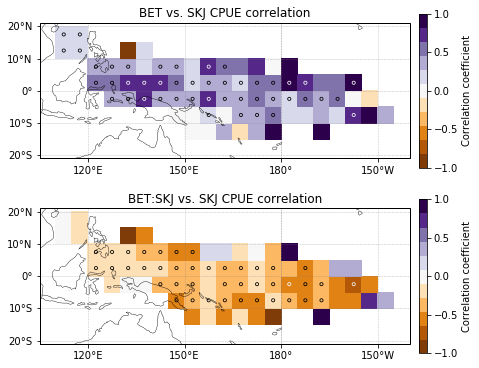

In [31]:
%run figure_notebooks/fig1.ipynb

### Figure 2

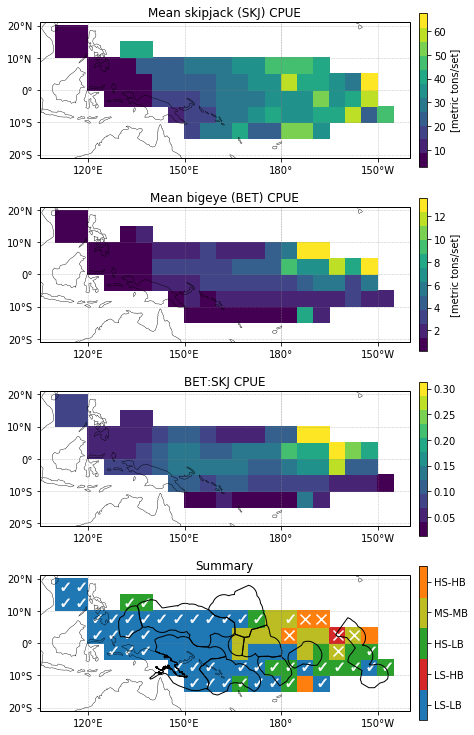

In [32]:
%run figure_notebooks/fig2.ipynb

### Figure 3

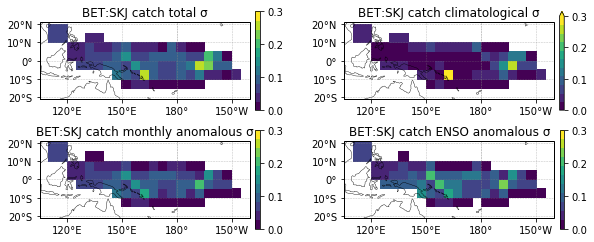

In [19]:
mapvarnow = 'bettoskj'
%run figure_notebooks/fig3.ipynb

### Figure 4

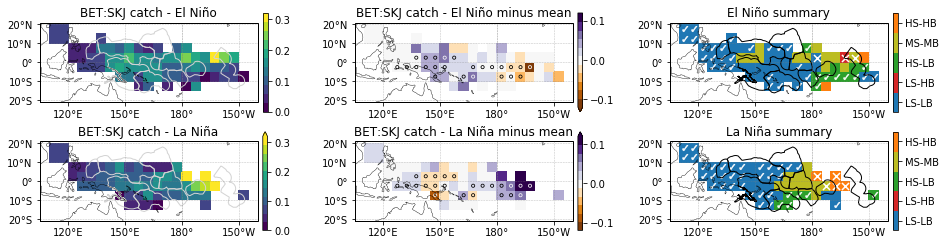

In [33]:
mapvarnow = 'bettoskj'
%run figure_notebooks/fig4.ipynb

### Figure 5

SKJ CPUE within PNA EEZs left medians, means:
[4.63497519493103, 23.337682723999023, 15.774703979492188, 18.68938446044922, 24.37333583831787, 29.561219215393066, 30.01768684387207, 27.912531852722168, 29.835572242736816, 35.81155014038086]
[7.0468388, 24.65096, 17.524149, 20.517653, 24.621552, 30.315954, 29.988325, 33.601543, 39.159378, 41.50945]
middle medians, means:
[5.184481620788574, 24.151411056518555, 16.83989143371582, 20.273736000061035, 28.22077178955078, 31.968564987182617, 31.12686538696289, 29.770282745361328, 25.23531150817871, 35.81155014038086]
[6.997404, 25.957344, 19.251524, 23.043354, 29.586693, 32.290806, 33.72428, 37.15391, 35.369305, 40.3106]
right medians, means:
[5.708381652832031, 24.51101303100586, 17.13985538482666, 22.069982528686523, 33.996633529663086, 29.06793212890625, 36.38367462158203, 30.024978637695312, 24.155363082885742, nan]
[6.5484176, 26.102644, 19.4881, 25.622587, 34.15958, 31.040567, 41.957428, 34.02878, 28.029074, nan]
SKJ CPUE boxplot # of 

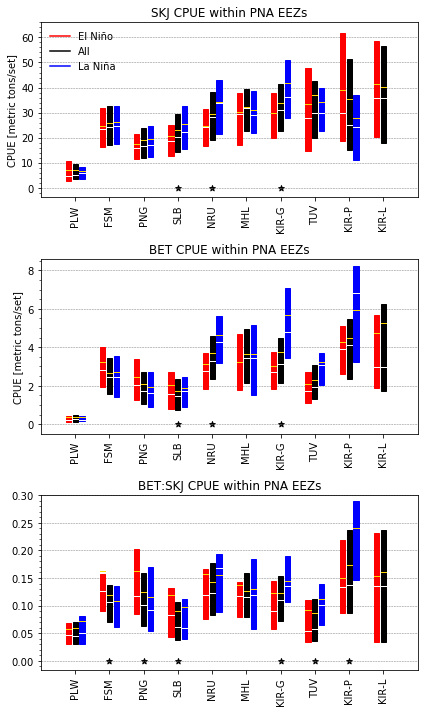

In [34]:
%run figure_notebooks/fig5.ipynb

### Figure 6

SKJ CPUE within PNA EEZs win medians, means:
[5.09328293800354, 27.028385162353516, 19.008813858032227, 23.79523277282715, 26.22946834564209, 32.911848068237305, 30.471684455871582, 32.26505756378174, 31.273935317993164, 54.74898910522461]
[7.2308993, 29.572615, 20.997187, 26.045872, 28.50137, 30.89649, 31.773455, 37.823307, 37.150684, 51.08183]
spr medians, means:
[4.974183082580566, 28.91399097442627, 17.783205032348633, 21.81779670715332, 34.847877502441406, 35.7360782623291, 31.36639976501465, 25.683504104614258, 35.84394454956055, nan]
[7.1711197, 31.292912, 20.054327, 23.210203, 34.151283, 39.044308, 31.977781, 26.966288, 42.375526, nan]
sum medians, means:
[5.600501775741577, 19.063847541809082, 13.177585124969482, 15.25151777267456, 28.193889617919922, 27.30126953125, 30.2703914642334, 22.66754913330078, 20.094507217407227, 26.913728713989258]
[6.5877724, 20.726978, 14.573561, 15.455522, 28.27091, 30.594534, 33.292625, 23.294493, 26.50341, 41.522053]
aut medians, means:
[5.3107

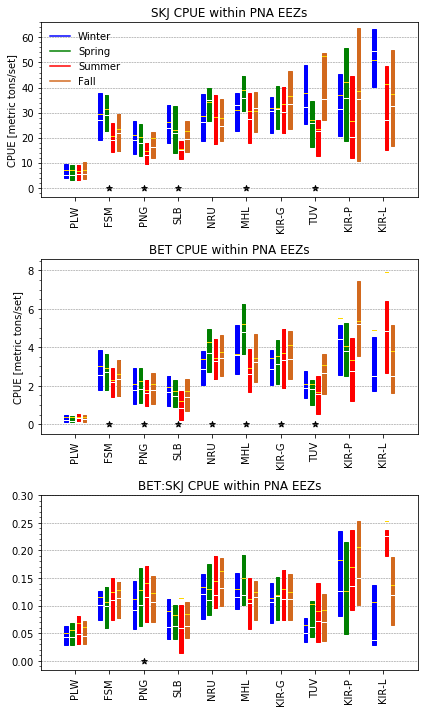

In [35]:
%run figure_notebooks/fig6.ipynb

### Figure 7

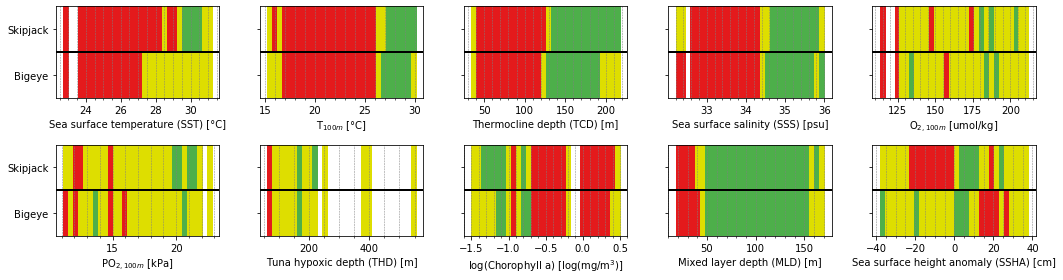

In [36]:
%run figure_notebooks/fig7.ipynb

### Figure 8

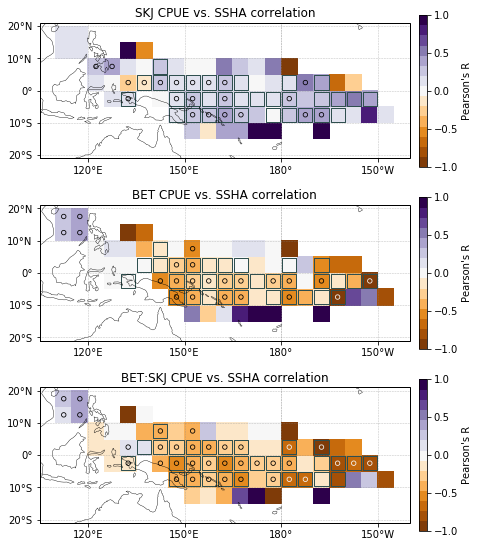

In [37]:
%run figure_notebooks/fig8.ipynb

# Plot supp figures

### Supplementary Figure 2

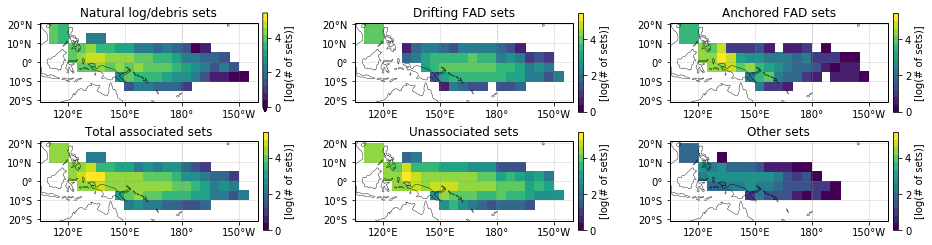

In [38]:
%run figure_notebooks/suppfig2.ipynb

### Supplementary Figure 3

['skj_cp_tot', 'bet_cp_tot', 'sss', 'sst', 'temp100', 'tcd', 'o2100', 'po2100', 'thd', 'logchl', 'mld', 'ssha']


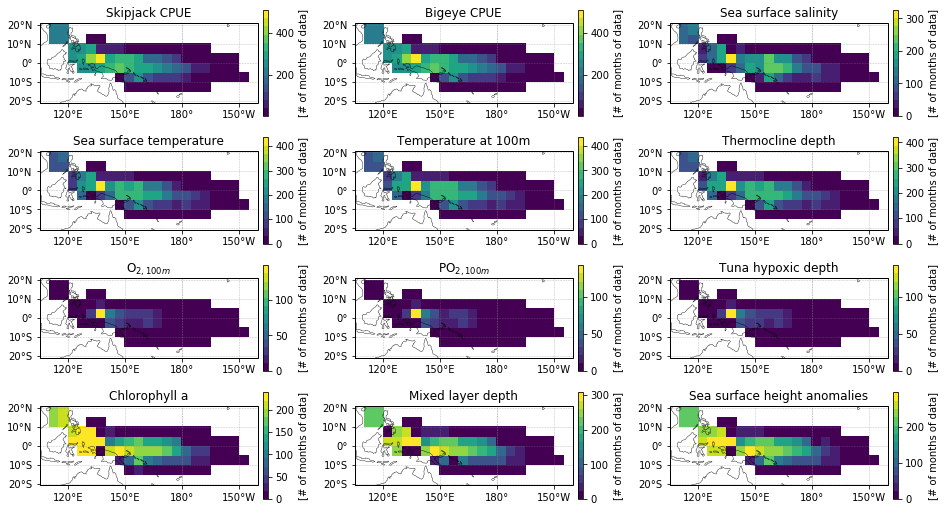

# of monthly mean data pts overlapping w/ skj_cp_tot:
lat: 9842
time: 9842
bettoskj_cp_tot: 9819
skj_cp_tot: 9842
bet_cp_tot: 9842
sst: 7079
temp100: 7267
tcd: 6926
sss: 5220
o2100: 627
po2100: 580
thd: 591
logchl: 6605
mld: 7395
ssha: 7936
oni: 9842
# of monthly mean data pts overlapping w/ bet_cp_tot:
lat: 9842
lon: 9842
bettoskj_cp_tot: 9819
skj_cp_tot: 9842
bet_cp_tot: 9842
sst: 7079
temp100: 7267
tcd: 6926
sss: 5220
o2100: 627
po2100: 580
thd: 591
logchl: 6605
mld: 7395
ssha: 7936
oni: 9842
# of monthly mean data pts overlapping w/ bettoskj_cp_tot:
lon: 9819
time: 9819
bettoskj_cp_tot: 9819
skj_cp_tot: 9819
bet_cp_tot: 9819
sst: 7059
temp100: 7247
tcd: 6907
sss: 5206
o2100: 626
po2100: 579
thd: 590
logchl: 6593
mld: 7379
ssha: 7921
oni: 9819


In [39]:
%run figure_notebooks/suppfig3.ipynb

### Supplementary Figures 4-5

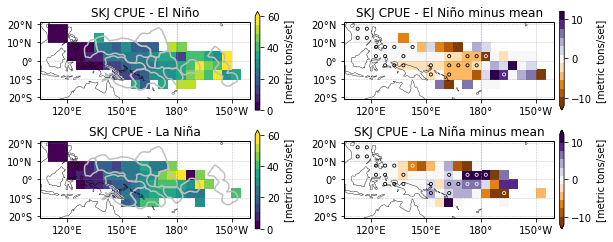

In [40]:
mapvarnow = 'skj'
%run figure_notebooks/suppfig4_5.ipynb

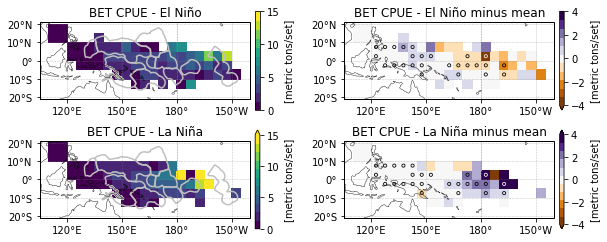

In [41]:
mapvarnow = 'bet'
%run figure_notebooks/suppfig4_5.ipynb

### Supplementary Figures 6-8

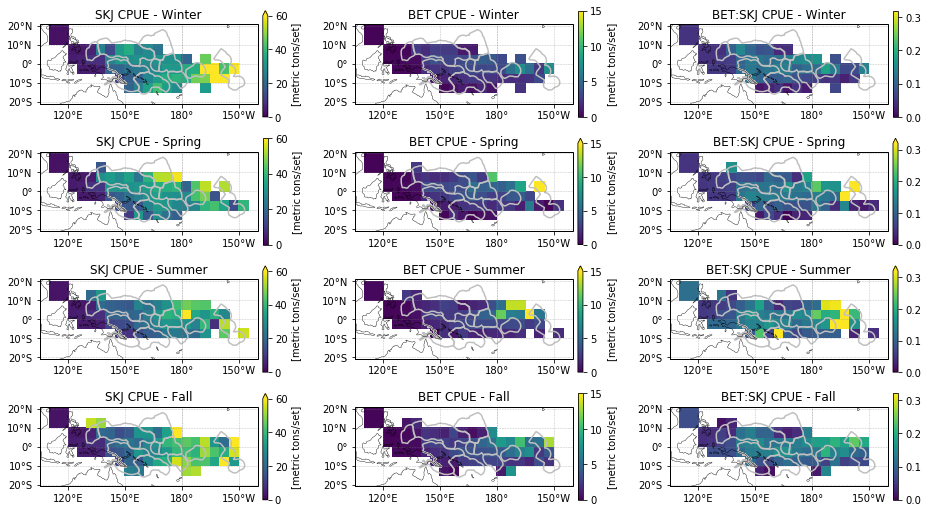

In [42]:
totanomnow = 'tot'
%run figure_notebooks/suppfig6_8.ipynb

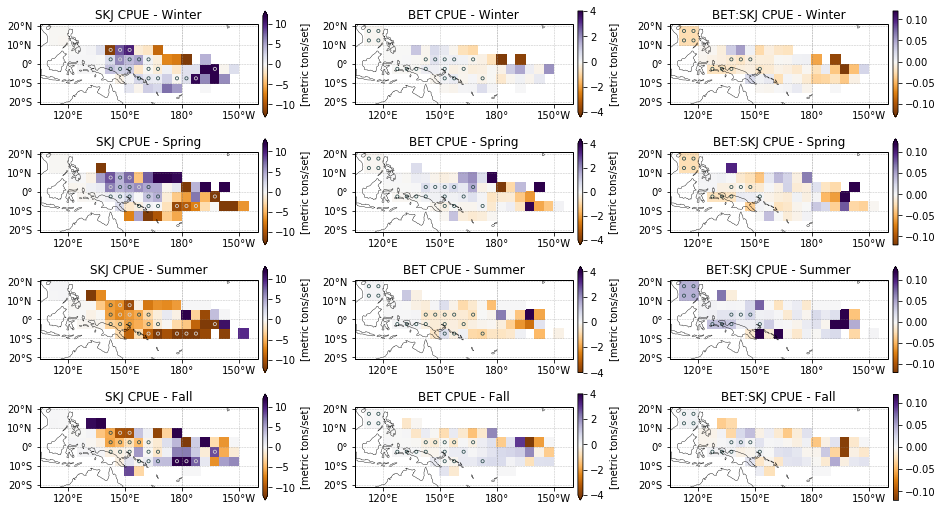

In [43]:
totanomnow = 'anom'
%run figure_notebooks/suppfig6_8.ipynb

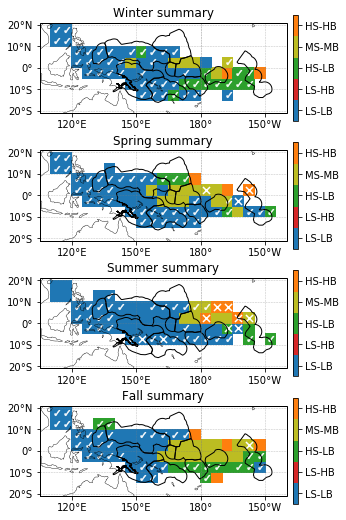

In [44]:
%run figure_notebooks/suppfig6_summary.ipynb

### Supplementary Figures 9-10

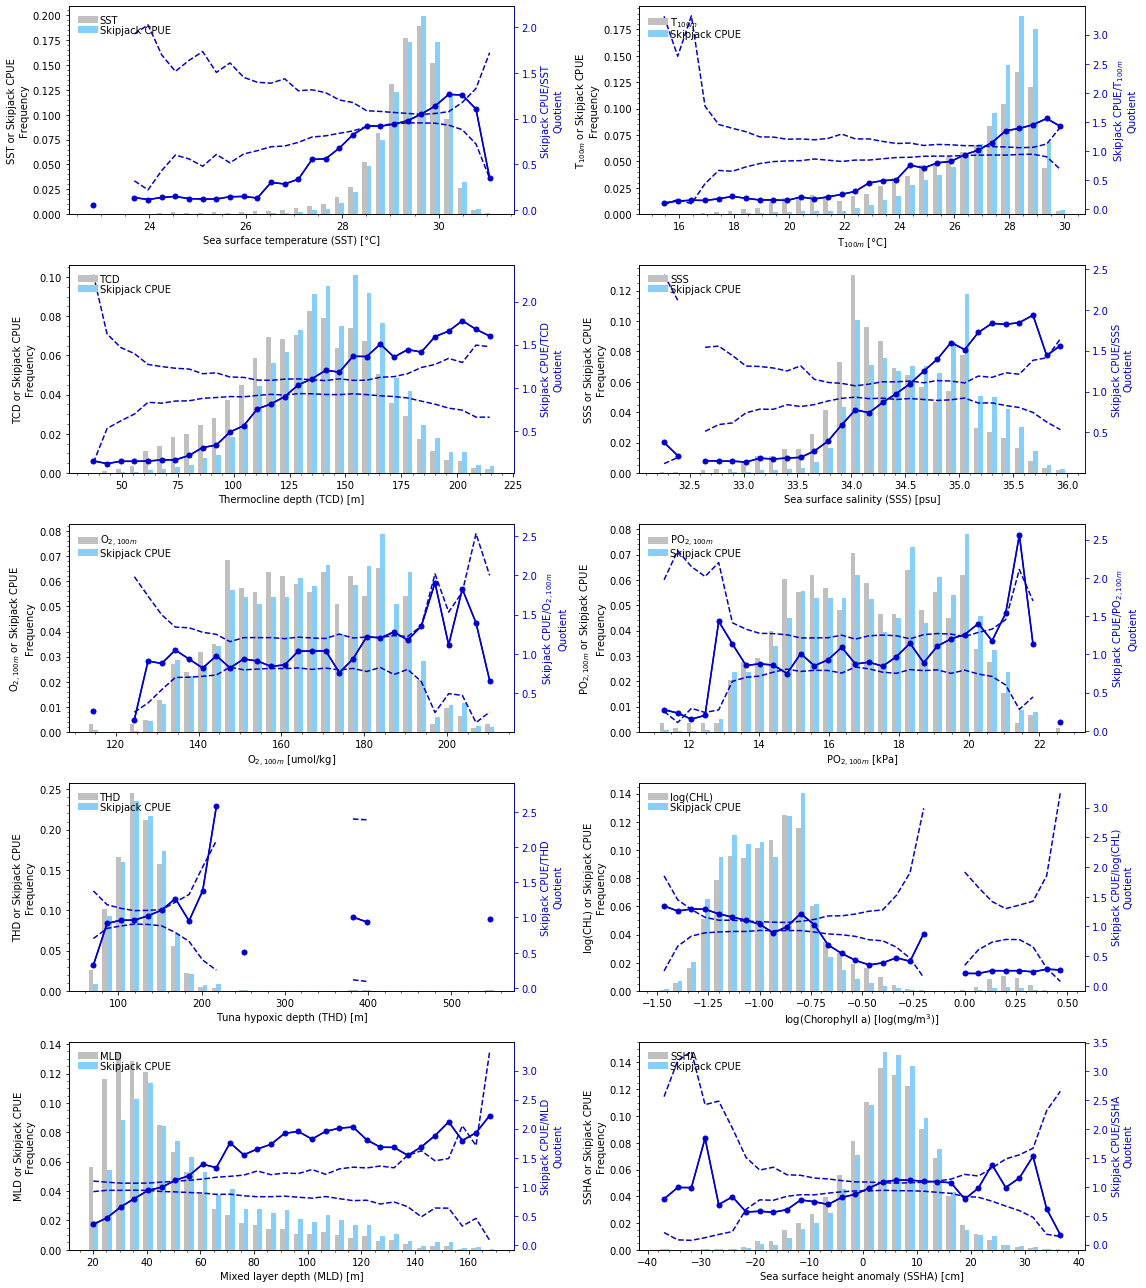

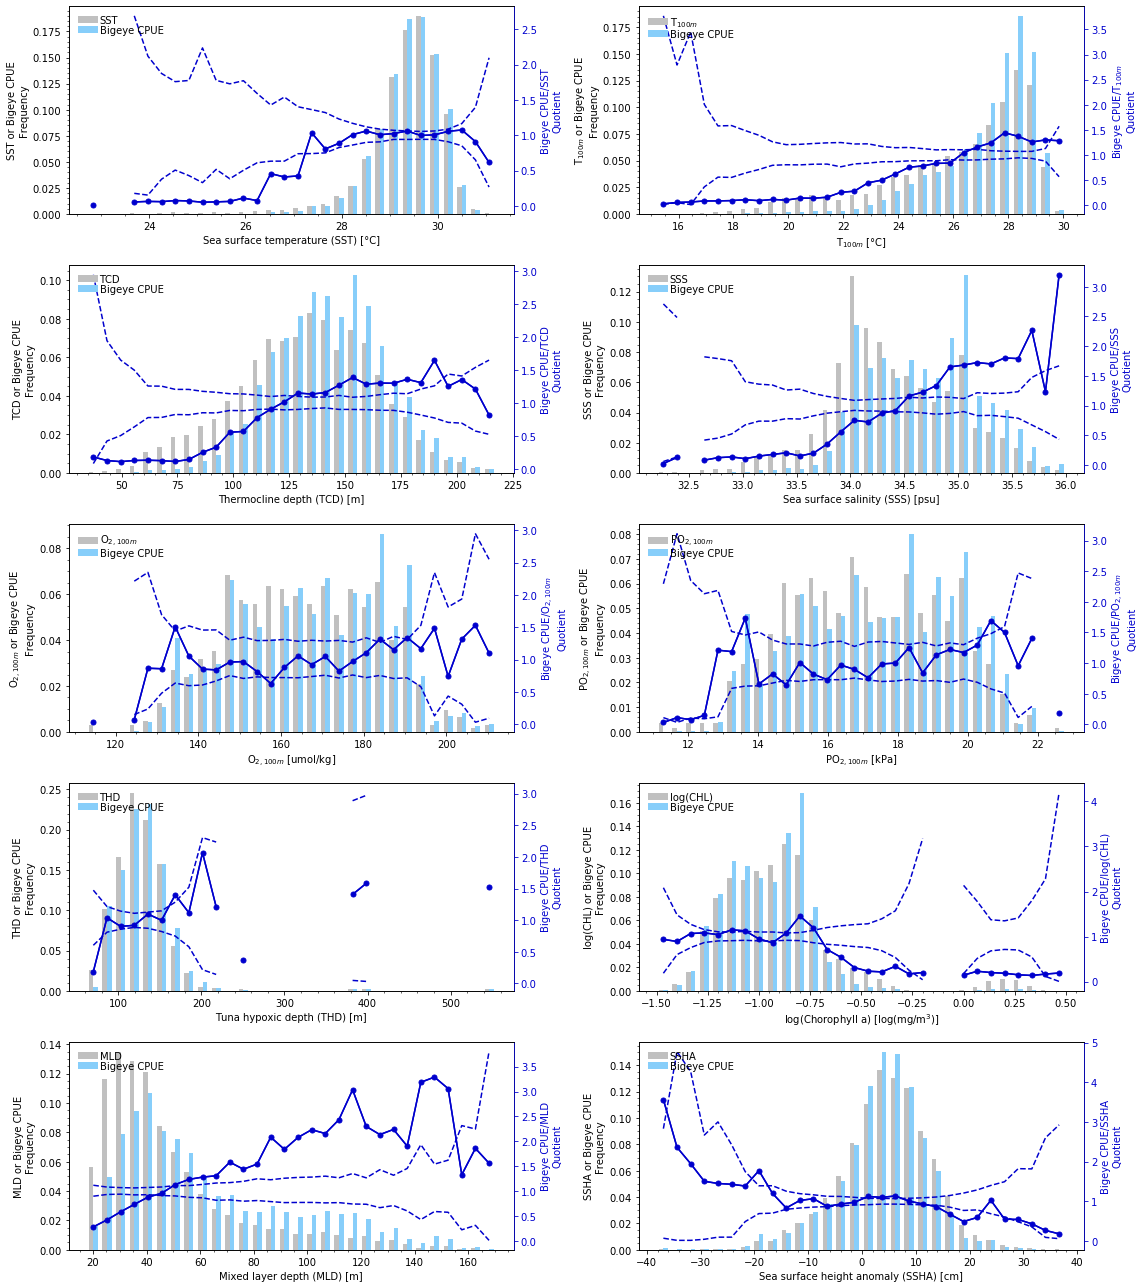

In [45]:
%run figure_notebooks/suppfig9_10.ipynb

### Supplementary Figures 11-13

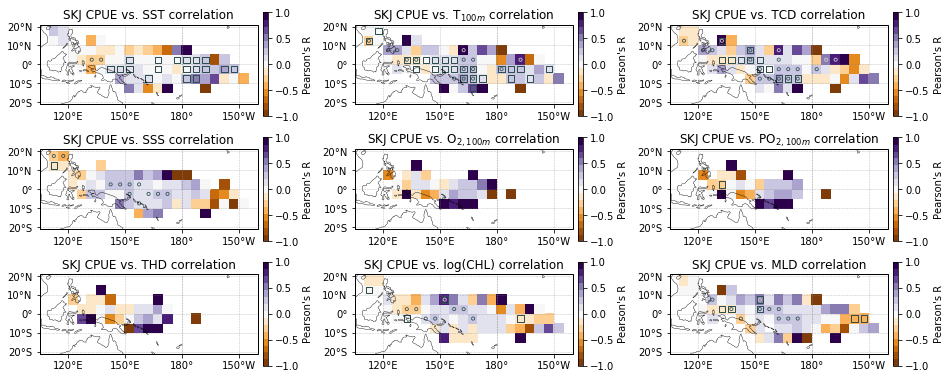

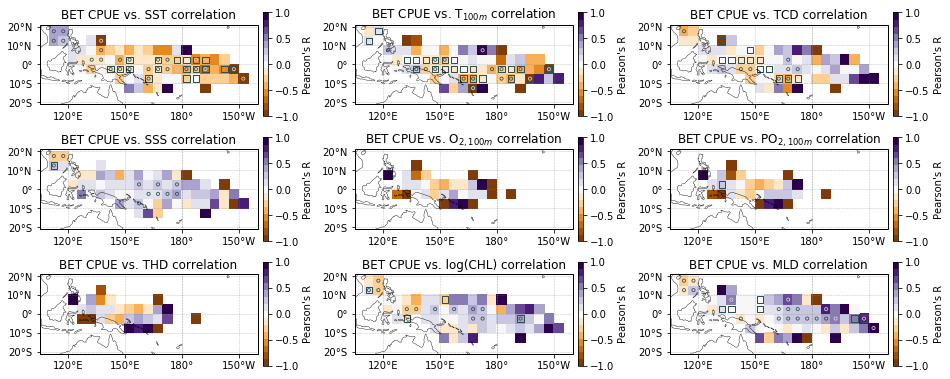

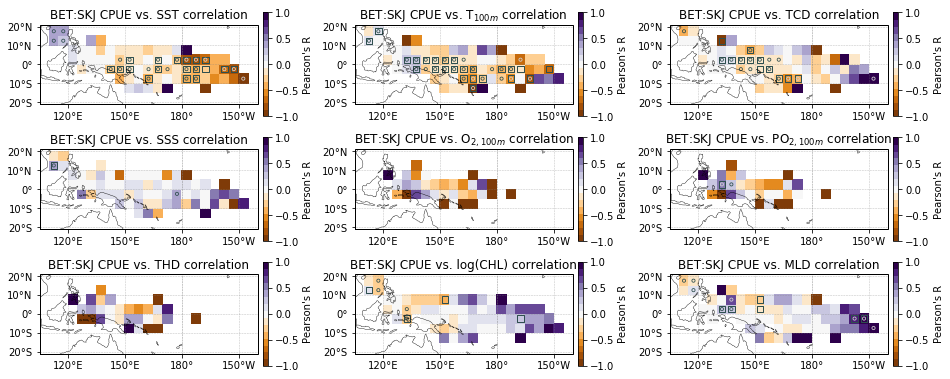

In [46]:
%run figure_notebooks/suppfig11_13.ipynb

### Supplementary Figure 14

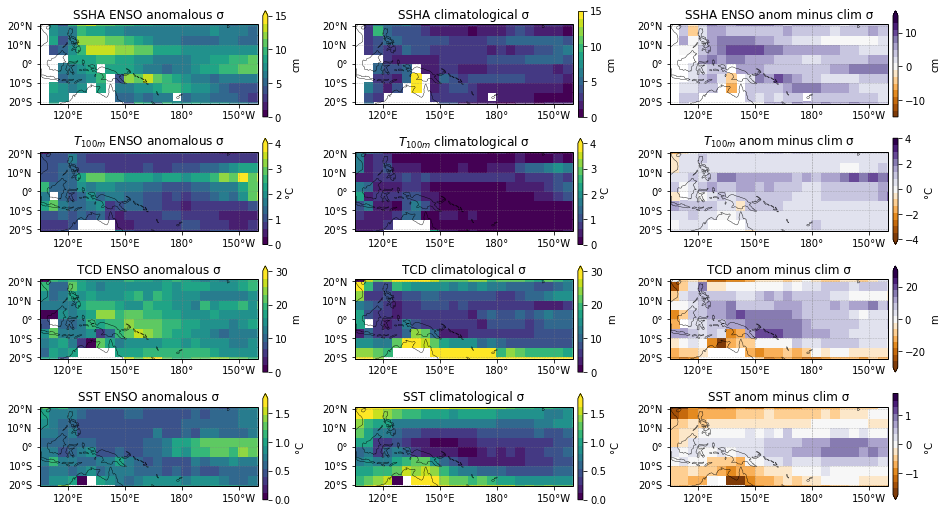

In [47]:
%run figure_notebooks/suppfig14.ipynb